In [1]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.losses import categorical_crossentropy
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from keras.activations import sigmoid, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from math import sqrt
import pandas as pd
import numpy as np
import statistics
import random
import json
import math
import io

................................................ Dataset ................................................

In [2]:
dataset = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
dataset = dataset.drop(columns=['Time'])
dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
Train, Test = train_test_split(dataset, test_size=0.2, shuffle = True, random_state = 0)
print(Train.groupby('Class').size())

Y_train = Train.Class ; X_train = Train.drop(columns=['Class'])
Y_test  = Test.Class  ; X_test  = Test.drop(columns=['Class'])

Class
0    227454
1       391
dtype: int64


.................................. SMOTE Oversampling ..................................

In [4]:
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_res, Y_train_res = oversample.fit_resample(X_train, Y_train)
print(X_train_res.groupby(Y_train_res).size())

Class
0    227454
1    227454
dtype: int64


................................ Denoising Autoencoder ................................

In [5]:
X_train_res_noisy = X_train_res + np.random.normal(0, 1, X_train_res.shape)
x_train_res, x_valid_res, y_train_res, y_valid_res = train_test_split(X_train_res, Y_train_res, test_size=0.2, random_state=10)
x_train_res_noisy, x_valid_res_noisy, y_train_res, y_valid_res = train_test_split(X_train_res_noisy, Y_train_res, test_size=0.2, random_state=10)

In [6]:
def Normalize(df):
    scaler = MinMaxScaler() ; return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    

x_train_res_norm = Normalize(x_train_res)
x_valid_res_norm = Normalize(x_valid_res)
x_train_res_noisy_norm = Normalize(x_train_res_noisy)
x_valid_res_noisy_norm = Normalize(x_valid_res_noisy)
X_test_norm = Normalize(X_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Enc1 (Dense)                 (None, 22)                660       
_________________________________________________________________
Enc2 (Dense)                 (None, 15)                345       
_________________________________________________________________
Enc3 (Dense)                 (None, 10)                160       
_________________________________________________________________
Dec1 (Dense)                 (None, 15)                165       
_________________________________________________________________
Dec2 (Dense)                 (None, 22)                352       
_________________________________________________________________
Dec3 (Dense)                 (None, 29)                667       
Total params: 2,349
Trainable params: 2,349
Non-trainable params: 0
____________________________________________________

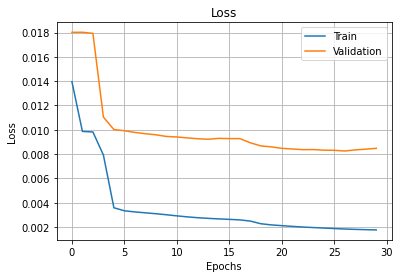

In [9]:
DAE = Sequential()
DAE.add(Input(shape = x_train_res_noisy_norm.shape[-1]))
DAE.add(Dense(22, name = 'Enc1', activation = sigmoid))
DAE.add(Dense(15, name = 'Enc2', activation = sigmoid))
DAE.add(Dense(10, name = 'Enc3', activation = sigmoid))
DAE.add(Dense(15, name = 'Dec1', activation = sigmoid))
DAE.add(Dense(22, name = 'Dec2', activation = sigmoid))
DAE.add(Dense(29, name = 'Dec3', activation = sigmoid))
DAE.summary()

DAE.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
DAE_history = DAE.fit(x_train_res_noisy_norm, x_train_res_norm, batch_size=1024, epochs=30, shuffle=True, validation_data=(x_valid_res_noisy_norm, x_valid_res_norm))

print('\n')
plt.figure(figsize=(6,4))
plt.plot(DAE_history.epoch,DAE_history.history['loss'])
plt.plot(DAE_history.epoch,DAE_history.history['val_loss'])
plt.grid() ; plt.title('Loss') ; plt.xlabel('Epochs') ; plt.ylabel('Loss') ; plt.legend(['Train', 'Validation'])

x_train_res_noisy_norm_denoised = pd.DataFrame(DAE.predict(x_train_res_noisy_norm),columns=x_train_res_noisy_norm.columns)
x_valid_res_noisy_norm_denoised = pd.DataFrame(DAE.predict(x_valid_res_noisy_norm),columns=x_train_res_noisy_norm.columns)

.............................................. FC Model ..............................................

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 22)                660       
_________________________________________________________________
Dense2 (Dense)               (None, 15)                345       
_________________________________________________________________
Dense3 (Dense)               (None, 10)                160       
_________________________________________________________________
Dense4 (Dense)               (None, 5)                 55        
_________________________________________________________________
Dense5 (Dense)               (None, 2)                 12        
Total params: 1,232
Trainable params: 1,232
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
356/356 [==============================] - 3s 7ms/step - loss: 0.6923 - accuracy: 0.5431 - val_loss: 0.6831

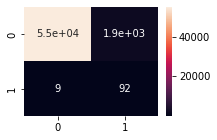

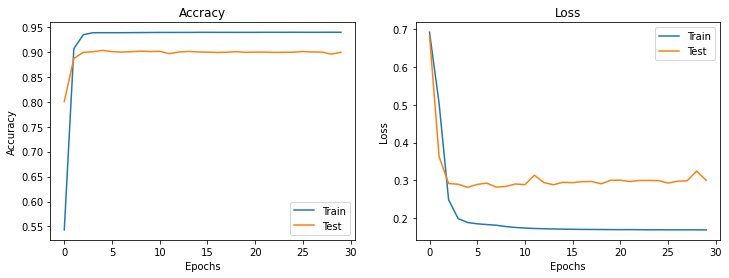

In [8]:
y_train_res_onehot = np_utils.to_categorical(y_train_res)
y_valid_res_onehot = np_utils.to_categorical(y_valid_res)
Y_test_onehot = np_utils.to_categorical(Y_test)

FC = Sequential()
FC.add(Input(shape = x_train_res_noisy_norm_denoised.shape[-1]))
FC.add(Dense(22, name = 'Dense1', activation = softmax))
FC.add(Dense(15, name = 'Dense2', activation = softmax))
FC.add(Dense(10, name = 'Dense3', activation = softmax))
FC.add(Dense( 5, name = 'Dense4', activation = softmax))
FC.add(Dense( 2, name = 'Dense5', activation = softmax))
FC.summary()

FC.compile(optimizer=Adam(learning_rate=0.001), loss=categorical_crossentropy, metrics=['accuracy'])
FC_history = FC.fit(x_train_res_noisy_norm_denoised, y_train_res_onehot, batch_size=1024, epochs=30, shuffle=True, validation_data=(x_valid_res_noisy_norm_denoised, y_valid_res_onehot))
Y_pred_onehot = FC.predict(X_test_norm) ; Y_pred = np.argmax(Y_pred_onehot, axis=1)

def Plot (Model_history, Lbl_pred, Lbl_true):
    ACC = Model_history.history['accuracy']
    ACC_val = Model_history.history['val_accuracy']
    Loss = Model_history.history['loss']
    Loss_val = Model_history.history['val_loss']
    print('\nMax accuracy in train data:', max(ACC), ', happened in epoch:', ACC.index(max(ACC))+1)
    print('Max accuracy in test data:', max(ACC_val), ', happened in epoch:', ACC_val.index(max(ACC_val))+1)
    print('Min loss in train data:', min(Loss), ', happened in epoch:', Loss.index(min(Loss))+1,)
    print('Min loss in test data:', min(Loss_val), ', happened in epoch:', Loss_val.index(min(Loss_val))+1,'\n')
    print(classification_report(Lbl_true, Lbl_pred, target_names=['Class 0', 'Class 1']))
    print('Confusion Matrix \n',confusion_matrix(Lbl_true, Lbl_pred),'\n')
    plt.figure(figsize=( 3,2)) ; sns.heatmap(confusion_matrix(Lbl_true, Lbl_pred), annot=True)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1) ; plt.plot(ACC) ; plt.plot(ACC_val) ; plt.xlabel('Epochs') ; plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test']) ; plt.title('Accracy')
    plt.subplot(1,2,2) ; plt.plot(Loss) ; plt.plot(Loss_val) ; plt.xlabel('Epochs') ; plt.ylabel('Loss')
    plt.legend(['Train', 'Test']) ; plt.title('Loss')
    plt.show()
Plot(FC_history, Y_pred, Y_test)